# Yet another practical introduction to deep learning

## Generalities

### Max Halford

#### Toulouse School of Economics Master's degree

## Information

- We have a lot to cover
- Please ask questions
- The slides are available [here](https://github.com/MaxHalford/data-science-tutorials)
- For this part of the course, you'll be graded by having to write a short essay
- All the learning material you need (for free!):
    1. [Stanford CS230 Deep Learning -- Andrew Ng and Kian Katanforoosh](https://cs231n.github.io/)
    2. [The Deep Learning textbook -- Ian Goodfellow, Yoshua Bengio and Aaron Courville](http://www.deeplearningbook.org/)
    3. [Deep Learning with Python -- Francois Chollet](http://faculty.neu.edu.cn/yury/AAI/Textbook/Deep%20Learning%20with%20Python.pdf)

In [6]:
%matplotlib inline
%load_ext watermark
%watermark -m -v -p imageio,keras,tensorflow,sklearn,matplotlib

CPython 3.7.4
IPython 7.4.0

imageio 2.5.0
keras 2.2.4
tensorflow 1.14.0
sklearn 0.21.3
matplotlib 3.0.3

compiler   : GCC 7.3.0
system     : Linux
release    : 5.2.10-arch1-1-ARCH
machine    : x86_64
processor  : 
CPU cores  : 8
interpreter: 64bit


## What is deep learning?

- Subcase of machine learning, which is itself a subcase of artificial intelligence
- Artificial intelligence is about understanding concepts
- Machine learning is about learning concepts through example
- Deep learning is a specific machine learning method which works (very) well in some cases 

## The fit/predict paradigm

Our goal is to learn from a set of training examples `(X_train, y_train)` and to predict the (unknown) outcome of a test set `X_test`.

    X_train, y_train, X_test = split(dataset)
    
`X_train` and `X_test` are the inputs, they can be images, text, tabular data, graphs... `y_train` is the output, it can be a real number, a class, multiple numbers, multiple classes... As we will see deep learning is very flexible, and a lot of cases can be handled.

We "train" (or "fit", it's the same meaning) a model by showing it examples.

    model = model.fit(X_train, y_train)
    
We "predict" by running test examples through the model and getting outputs.

    y_pred = model.predict(X_test)
    
Note that `X_train`, `X_test`, and `y_train` can be stored in memory, or can be streamed from the disk (more about this later).

## Learning tasks

In machine learning, we teach a learning algorithm to learn to perform a task by showing it examples. We want the learning algorithm to find general patterns in what it is shown, and not to memorize. We typically represent an example with a vector $x$. If we're doing supervised learning then there will also be an accompanying label $y$. Here are a few common tasks:

- **Classification**: the algorithm has to predict one of $k$ possible classes. Binary classification is special case where $k = 1$. In multi-output classification, there can be more than one class.
- **Regression**: the algorithm has to predict a real-valued output. In multi-output regression, there can be multiple real-valued outputs to predict.
- **Denoising**: the algorithm takes as input a noisy vector $\tilde{x}$, and has to produce a clean output vector $x$. 
- **Auto-encoding**: the algorithm takes as input $x$, and has to predict the exact same output $x$. It is however constrained by it's capacity. If the algorithm doesn't manage to reproduce an example, then that can be indicator that the input is an outlier/anomaly with respect to the training data.
- **Density estimation**: the algorithm has to output the density $p$ of a vector $x$. In effect the learning algorithm acts as a non-parametric probability distribution that fits the data.

## Evaluating performance

Knowing how well a model performs is very important. To do so, we can:

1. Split the training set in two:
    1. (`X_fit`, `y_fit`), the learning set
    2. (`X_val`, `y_val`), the validation set
2. Train the model on (`X_fit`, `y_fit`)
3. Obtain predictions `y_pred` for `X_val`
4. Calculate the error by comparing `y_pred` and `y_val`

We thus look at the performance of the model on unseen data. Indeed, our goal is to have a model that generalizes well. This is very important. 

We can repeat the above process many times with random subsets and average the error scores. This is called [cross-validation](https://www.wikiwand.com/en/Cross-validation_(statistics)) and is very important in practice.

## A simple example: MNIST digits classification

In [3]:
from sklearn import datasets

X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)  # Takes a bit of time

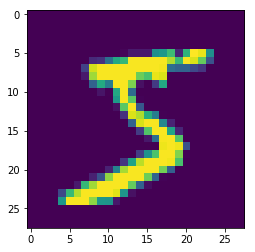

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.imshow(X[0].reshape(28, 28))

In [6]:
n_images, n_pixels = X.shape

print(f'There are {n_images} images')
print(f'Each image is composed of {n_pixels} pixels')

There are 70000 images
Each image is composed of 784 pixels


In [7]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

We one-hot encode the labels because that's the only to do multi-class classification with neural networks.

In [20]:
from keras import utils

y_one_hot = utils.to_categorical(y, num_classes=10)
y_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Let's the split the data.

In [23]:
def split(X, y):
    return (
        X[:60000],  # X_train is the first 60.000 images
        X[-10000:],  # X_test is the last 10.000 images
        y[:60000],  # y_train is the first 60.000 labels
        y[-10000:]  # y_test is the last 10.000 images
    )

X_fit, X_val, y_fit, y_val = split(X, y_one_hot)
X_fit[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Normalize the data.

In [25]:
X_fit = utils.normalize(X_fit)
X_val = utils.normalize(X_val)

Let's define a neural network.

In [30]:
from keras import layers
from keras import models

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),  # 784 is the number of pixels in each image
    layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Let's now train the model on the learning set.

In [33]:
model.fit(X_fit, y_fit, epochs=5, batch_size=32);

Epoch 1/5
60000/60000 [==============================] - 11s 178us/step - loss: 0.1304 - acc: 0.9625
Epoch 2/5
60000/60000 [==============================] - 11s 179us/step - loss: 0.1196 - acc: 0.9657
Epoch 3/5
60000/60000 [==============================] - 11s 181us/step - loss: 0.1118 - acc: 0.9682
Epoch 4/5
60000/60000 [==============================] - 11s 180us/step - loss: 0.1044 - acc: 0.9698
Epoch 5/5
60000/60000 [==============================] - 11s 182us/step - loss: 0.0988 - acc: 0.9720


Let's make predictions on the validation set.

In [38]:
from sklearn import metrics

y_pred = model.predict(X_val)
y_pred_labels = y_pred.argmax(axis=1)

y_val_labels = y_val.argmax(axis=1)

score = metrics.accuracy_score(y_val_labels, y_pred_labels)
print(f'Accuracy score on validation set is {score}')

Accuracy score on validation set is 0.9676


array([7, 2, 1, ..., 4, 5, 6])

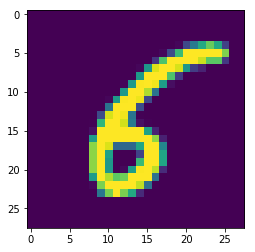

In [51]:

x = X_val[y_pred_labels != y_val_labels][2]

plt.imshow(x.reshape(28, 28))

In [52]:
y_pred_labels[y_pred_labels != y_val_labels][2]

5

The validation score is similar to the training score, which is a good sign.

## Overfitting

In [53]:
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_fit, y_fit, epochs=20, batch_size=32);

y_pred = model.predict(X_val)
y_pred_labels = y_pred.argmax(axis=1)
y_val_labels = y_val.argmax(axis=1)

score = metrics.accuracy_score(y_val_labels, y_pred_labels)
score

Epoch 1/20
60000/60000 [==============================] - 19s 313us/step - loss: 0.2263 - acc: 0.9314
Epoch 2/20
60000/60000 [==============================] - 18s 304us/step - loss: 0.0932 - acc: 0.9722
Epoch 3/20
60000/60000 [==============================] - 18s 305us/step - loss: 0.0674 - acc: 0.9807
Epoch 4/20
60000/60000 [==============================] - 18s 294us/step - loss: 0.0537 - acc: 0.9846
Epoch 5/20
60000/60000 [==============================] - 19s 318us/step - loss: 0.0444 - acc: 0.9879
Epoch 6/20
60000/60000 [==============================] - 19s 311us/step - loss: 0.0365 - acc: 0.9906
Epoch 7/20
60000/60000 [==============================] - 17s 288us/step - loss: 0.0326 - acc: 0.9918
Epoch 8/20
60000/60000 [==============================] - 17s 282us/step - loss: 0.0257 - acc: 0.9936
Epoch 9/20
60000/60000 [==============================] - 17s 283us/step - loss: 0.0239 - acc: 0.9939
Epoch 10/20
60000/60000 [==============================] - 17s 283us/step - loss: 

0.9822

## Keras

- High-level Python library for building and training neural networks
- Started in March 2015
- Abstracts a lot of complexity
- Doesn't do any compute, it's simply an abstraction on top of Tensorflow/Theano
- Very clean API interface
- Encourages you to think in terms of modules
- PyTorch is the main rival, both have their pros and cons
- [Documentation](https://keras.io/)

## Reminder about backpropagation

1. Your network is nothing more than a set of weights $w_i$
2. You have an input $x_i$ and a known output $y_i$
3. The network processes your input and produces an estimated output $\hat{y}_i$
4. You can calculate by how much the network is wrong by using a loss function $L(y_i, \hat{y}_i)$
5. The loss function if differentiable, and so we can we obtain the gradient $g_i$ with respect to each weight
6. We can then modify each weight by using the gradient

Backpropagation is the mechanism which will calculate the gradient $g_i$. If you're not interested in how it works, you can treat it as a blackbox and come back to it later on. Check out [this great demo](https://google-developers.appspot.com/machine-learning/crash-course/backprop-scroll/).

## Stochastic gradient descent

1. When we call `fit`, the neural network goes through each example in the dataset
2. For each observation $(x_i, y_i)$, the gradient $\nabla_i$ is obtained
3. An optimizer takes care of obtaining the new weights $w_{i+1}$ by modifying the current weights $w_i$ and using the current gradient $\nabla_i$
4. We can loop multiple times through the dataset; each iteration is called an **epoch**

A general formulation of stochastic gradient descent (SGD):

$$w_{i+1} \leftarrow f(w_i, \nabla_i, \eta_i)$$

$\eta_i$ is the learning rate at iteration $i$, it's *extremely* important and we'll come back to it very soon.

## Loss function

The list of loss functions implemented in Keras is available [here](https://keras.io/losses/). You can set the loss function via the `loss` parameter of the `compile` method.

There are many loss functions to choose. Choosing one mostly depends on what you're trying to do.

In [ ]:
from keras import losses

# MSE loss
model.compile(
    loss=losses.mean_squared_error,
    optimizer='sgd'
)

# Same thing
model.compile(
    loss='mean_squared_error',
    optimizer='sgd'
)

# Same thing
model.compile(
    loss='mse',
    optimizer='sgd'
)

**Mean Squared Error (MSE)**

Used for general purpose regression. Penalizes large mistakes.

$$L(y, \hat{y}) = (y - \hat{y}) ^ 2$$

**Logistic loss**

The most common loss used for classification. For binary classification Keras calls it `binary_crossentropy` whereas for multi-class classification it calls it `categorical_crossentropy`.

$$L(y, p) = log(1 + exp(-yp))$$

**Poisson loss**

Used for estimating counts (arrivals in an airport, number of call events to call center, etc.), which is a specific case of regression.

$$L(y, \hat{y}) = \hat{y} - y \times log(\hat{y})$$

**Hinge loss**

$$L(y, p) = max(0, 1 - yp)$$

Loss functions have a big impact on the learning algorithm. For instance the only difference between linear regression and logistic regression is that linear regression is a linear model with a squared loss whereas logistic regression is a linear model with a logistic loss.

There are many more loss functions that you can use in machine learning. You can even design your own! For example the deep learning community introduced the [focal loss](https://arxiv.org/abs/1708.02002) to deal with imbalanced datasets. Vowpal Wabbit also [designed](https://arxiv.org/abs/1011.1576) a set of loss functions that support importance weights. [Here](https://keras.io/losses/) is the documentation for Keras.

## Mini-batching

At each iteration $i$, instead of updating the weights $w_i$ by using the gradient $g_i$, we can accumulate the gradients and only update the weights every $k$ iterations.

The gradient we will use to update the weights will thus be the average of the past $k$ gradients. This is called **mini-batch gradient descent**. Stochastic gradient descent can be seen as a special case of mini-batch gradient descent when the batch size is set to 1.

![mini-batch](mini-batch.png)

In Keras, the batch size is set when calling the `fit` method:

```python
model.fit(X_fit, y_fit, epochs=20, batch_size=32)
```

The batch size is important. Small batch size work well because they are a form of regula

Here are some links if you want to get some intuitions:

- [Tradeoff batch size vs. number of iterations to train a neural network - Cross Validated](https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network)
- [What is batch size in neural network? - Cross Validated](https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network)
- [In deep learning, why don't we use the whole training set to compute the gradient? - Quora](https://www.quora.com/In-deep-learning-why-dont-we-use-the-whole-training-set-to-compute-the-gradient)

## Input normalization

When you're doing gradient descent, the scale of the features matters a lot. Indeed the magnitudes of the gradient descent steps are influenced by the absolute values of the features. If the features are too large, then the gradient steps might be too large and the model will diverge.

**Always scale your data**

99% of the time, it is recommended to scale your data so that each feature has mean 0 and standard deviation 1. See [this](http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html) for a deeper explanation.
 
You can use scikit-learn's `scale` method from the `preprocessing` module.

In [56]:
import pandas as pd
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
X.mean(axis=0).astype(int)

array([  3,  11,  11,   0,   0,   6,  68,   3,   9, 408,  18, 356,  12])

In [57]:
X.std(axis=0).astype(int)

array([  8,  23,   6,   0,   0,   0,  28,   2,   8, 168,   2,  91,   7])

In [59]:
from sklearn import preprocessing

X_scaled = preprocessing.StandardScaler().fit_transform(X)
X_scaled.mean(axis=0).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [61]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Regularization

In the previous slide we just mentionned the word **regularization**, what is it exactly?

1. A machine learning model learns from a training set 
2. We want the model to perform well on a test set it hasn't seen
3. The stronger the model, the more there is a chance that it overfits by memorizing patterns that only exists in the training set
4. Regularizing a model means that we make it's life harder  
5. There are many ways to regularize a neural network:
    1. Use more data! The more training data there is, the more the model will focus on general patterns
    2. Penalize the updates made to the weights by the optimizer 
    3. Use dropout
    4. Use batch normalization
    5. Use early stopping
    
![complexity](complexity.png)

## Optimizer

The list of available optimizers is available [here](https://keras.io/optimizers/). A good overview of the optimizers commonly used in deep learning is available [here](https://ruder.io/optimizing-gradient-descent/index.html).

**Stochastic Gradient Descent (SGD)**

$$w_{i+1} = w_{i} - \eta_i \nabla_i $$

**Momentum**

The idea is to accumulate the past gradients in order to not lose any acceleration. This can help from getting stuck into a local optima.

\begin{equation} 
\begin{split}
v_{i+1} = \gamma v_{i} + \eta_i \nabla_i \\
w_{i+1} = w_{i} - v_{i+1}
\end{split}
\end{equation}

**AdaGrad**

$$ w_{i+1} = w_{i} - \frac{\eta_i}{\sqrt{G_t + \epsilon}} \times g_{i}  $$

where $G_t$ is a diagonal matrix where each diagonal term is the sum of the squares of the past gradients. This has the effect of dampening the updates of the weights of frequently occurring features.

You can combine tricks: Adam is just Momentum + AdaDelta.

Read [Sebastian Ruder's](https://ruder.io/optimizing-gradient-descent/index.html) blog post for more details.

In [ ]:
from keras import optimizers

model.compile(
    loss='mse',
    optimizer=optimizers.SGD(lr=0.01, momentum=0.9),
)

model.compile(
    loss='mse',
    optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
)

## Learning rate

- The learning rate determines the amplitude of a weight update step.
- From Sebastian Ruder: "*Choosing a proper learning rate can be difficult. A learning rate that is too small leads to painfully slow convergence, while a learning rate that is too large can hinder convergence and cause the loss function to fluctuate around the minimum or even to diverge.*"
- Learning rate schedulers exist, but they are defined independently from the characteristics of the dataset.
- Léon Bottou [proposed](https://cilvr.cs.nyu.edu/diglib/lsml/bottou-sgd-tricks-2012.pdf) an adaptive learning rate, but is not implemented in Keras

![learning-rate](learning-rate.png)

In Keras we specify the learning rate via the `optimizer` we choose.

A common misconception is that Keras uses a constant learning rate. It doesn't. It has the following update schedule:

```python
learning_rate = learning_rate * 1 / (1 + decay * epoch)
```

where `decay` is a parameter given to the `optimizer` and `epoch` is the current epoch number.

You can override the learning rate by using the [`LearningRateScheduler` callback](https://keras.io/callbacks/#learningratescheduler).

You can also use the [`ReduceLROnPlateau` callback](https://keras.io/callbacks/#reducelronplateau) to modify the learning rate when a metric has stopped improving.

## Layers

In [64]:
model.layers

In [65]:
model.layers[0].input

<tf.Tensor 'dense_11_input:0' shape=(?, 784) dtype=float32>

In [28]:
model.layers[0].output

<tf.Tensor 'dense_3/Relu:0' shape=(?, 512) dtype=float32>

In [30]:
model.layers[1].input

<tf.Tensor 'dense_3/Relu:0' shape=(?, 512) dtype=float32>

Now let's take a deep dive into [Keras' documentation on layers](https://keras.io/layers/about-keras-layers/) as it is excellent.

## Weight initialization

Initializing the weights of a neural network might seem like a detail, but it helps when the network is quite large. In Keras, you can choose an initializer for each layer:

```python
network = models.Sequential([
    layers.Dense(
        units=16,
        input_shape=(number_of_features,),
        kernel_initializer='random_uniform',
        bias_initializer='zeros'
    ),
    layers.Dense(units=16, kernel_initializer='glorot_normal'),
    layers.Dense(units=1, bias_initializer='he_normal')
])
```

[Here](https://keras.io/initializers/) is the Keras documentation.

## Metrics

A metric measures the performance of a learning algorithm. It is different from a loss function, which is used to obtain gradients. Ideally, if we want to optimize a metric, we would want to use the metric as a loss function. Alas, not all metrics are differentiable. However, some loss functions act as good *proxies*. For instance, if your aim is to optimize accuracy, then using a Hinge loss might be a good idea.

For regression, we typically measure the [mean squared error (MSE)](https://www.wikiwand.com/en/Mean_squared_error). You can directly use the mean squared error as a loss function. The same goes for the root mean squared error (RMSE).

Measuring the [mean absolute error (MAE)](https://www.wikiwand.com/en/Mean_absolute_error) is also quite common as it makes a lot of sense for humans. In this case, using the mean squared error is suboptimal. The [Cauchy loss function](https://www.kaggle.com/c/allstate-claims-severity/discussion/24520#140163) might work better.

For classification you have many choices and it mostly depends on your application. Accuracy is typically a poor metric choice as it doesn't translate a business need. If you're interested in lowering false positives, then measure the precision. If you don't want false negatives, then measure the recall. If you want a mix of both then measure the F1-score. If you're only interested in getting a good ranking (such as for anomaly detection), then measure the AUC. The [Wikipedia page](https://www.wikiwand.com/en/Precision_and_recall) on precision and recall is quite information. In any case, you'll probably do fine by using the standard logarithmic loss. If your dataset is unbalanced or you really don't want false positives, then try out the [focal loss](https://arxiv.org/abs/1708.02002) or use sample weights. 

## Early stopping

A natural way to choose the number of epochs is to monitor the performance of the network on a validation at each epoch. When the score on the validation set goes down, then we can stop.

We'll use an example from [this](https://chrisalbon.com/deep_learning/keras/neural_network_early_stopping/) blog post.

In [66]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer

# Set the number of features we want
number_of_features = 1000

# Save np.load
np_load_old = np.load
# Modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
# Call load_data with allow_pickle implicitly set to true
(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=number_of_features)
# Restore np.load for future normal usage
np.load = np_load_old

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
train_features = tokenizer.sequences_to_matrix(train_data, mode='binary')
test_features = tokenizer.sequences_to_matrix(test_data, mode='binary')

Now let's define a neural network.

In [70]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

# SAME THING

network = models.Sequential([
    layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)),
    layers.Dense(units=16, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

# Compile the network
network.compile(loss='binary_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

Let's train the network.

In [72]:
history = network.fit(
    train_features, 
    train_target, 
    epochs=20, 
    verbose=1, 
    batch_size=100, 
    validation_data=(test_features, test_target)
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.1323 - acc: 0.9520 - val_loss: 0.5236 - val_acc: 0.8373
Epoch 2/20
25000/25000 [==============================] - 2s 88us/step - loss: 0.1227 - acc: 0.9584 - val_loss: 0.5471 - val_acc: 0.8303
Epoch 3/20
25000/25000 [==============================] - 1s 44us/step - loss: 0.1135 - acc: 0.9615 - val_loss: 0.5742 - val_acc: 0.8317
Epoch 4/20
25000/25000 [==============================] - 2s 96us/step - loss: 0.1041 - acc: 0.9656 - val_loss: 0.6143 - val_acc: 0.8311
Epoch 5/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.0959 - acc: 0.9697 - val_loss: 0.6450 - val_acc: 0.8304
Epoch 6/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.0875 - acc: 0.9731 - val_loss: 0.6778 - val_acc: 0.8284
Epoch 7/20
25000/25000 [==============================] - 2s 81us/step - loss: 0.0796 - acc: 0.9756 - val_loss: 0.7171 - val_acc

Now we can display the train and test performance for each epoch.

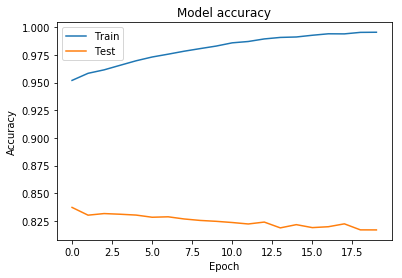

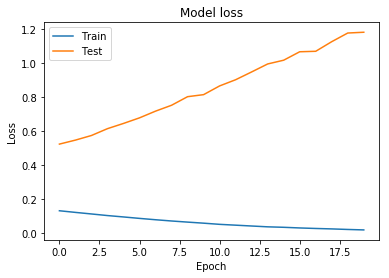

In [73]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [53]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=2),
    ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
]

history = network.fit(
    train_features, 
    train_target, 
    epochs=20, 
    verbose=1, 
    batch_size=100, 
    validation_data=(test_features, test_target),
    callbacks=callbacks
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 1s 56us/step - loss: 0.0960 - acc: 0.9691 - val_loss: 0.6513 - val_acc: 0.8330
Epoch 2/20
25000/25000 [==============================] - 2s 85us/step - loss: 0.0871 - acc: 0.9729 - val_loss: 0.6690 - val_acc: 0.8309
Epoch 3/20
25000/25000 [==============================] - 2s 85us/step - loss: 0.0794 - acc: 0.9760 - val_loss: 0.7140 - val_acc: 0.8291


## Visualizing a neural network

In [75]:
model = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(784,)),
    layers.Dropout(rate=0.2),
    layers.Dense(512, activation='relu'),
    layers.Dropout(rate=0.4),
    layers.Dense(10, activation='softmax'),
])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                5130      
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________
None


In [76]:
assert 803840 == 784 * 1024 + 1024
assert 524800 == 1024 * 512 + 512
assert 5130 == 512 * 10 + 10
assert 803840 + 524800 + 5130 == 1333770

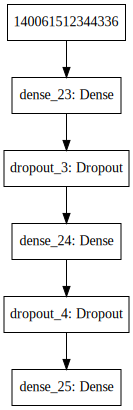

In [77]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Cross-validation

![cross-val](cross-val.png)

In [83]:
import numpy as np
from sklearn import datasets
from sklearn import model_selection

X, y = datasets.load_boston(return_X_y=True)

n_features = X.shape[1]

cross_val = model_selection.KFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

scores = np.zeros(cross_val.n_splits)

for i, (fit_idx, val_idx) in enumerate(cross_val.split(X, y)):
    
    X_fit = X[fit_idx]
    X_val = X[val_idx]
    y_fit = y[fit_idx]
    y_val = y[val_idx]
    
    model = models.Sequential([
        layers.Dense(16, activation='relu', input_shape=(n_features,)),
        layers.Dense(1),
    ])
    model.compile(loss='mse', optimizer='adam')
    
    # Train
    model.fit(X_fit, y_fit, epochs=5, shuffle=False, verbose=0, batch_size=8)
    
    # Make out-of-fold predictions
    y_pred = model.predict(X_val)
    
    # Store the score for this splits
    scores[i] = metrics.mean_squared_error(y_val, y_pred)
    
    print(f'Fold {i}, #fit: {len(fit_idx)}, #val: {len(val_idx)}, score: {scores[i]:.3f}')
    
print(f'Global score: {scores.mean():.3f} (± {scores.std():.3f})')

Fold 0, #fit: 404, #val: 102, score: 1344.536
Fold 1, #fit: 405, #val: 101, score: 209.252
Fold 2, #fit: 405, #val: 101, score: 121.046
Fold 3, #fit: 405, #val: 101, score: 122.218
Fold 4, #fit: 405, #val: 101, score: 265.985
Global score: 412.608 (± 469.186)


In [ ]:
Fold 0, #fit: 404, #val: 102, score: 96.737
Fold 1, #fit: 405, #val: 101, score: 146.192
Fold 2, #fit: 405, #val: 101, score: 83.327
Fold 3, #fit: 405, #val: 101, score: 343.134
Fold 4, #fit: 405, #val: 101, score: 72.344
Global score: 148.347 (± 100.612)

Cross-validation is a heavy process and so it is not often done in practice. You'll more often see people using a training set and a test set (also called **holdout set**).

## A closer look at the Keras methods 

In [81]:
?model.fit

In [82]:
?model.predict

In [57]:
?model.compile

Signature:
model.compile(
    optimizer,
    loss=None,
    metrics=None,
    loss_weights=None,
    sample_weight_mode=None,
    weighted_metrics=None,
    target_tensors=None,
    **kwargs,
)
Docstring:
Configures the model for training.

# Arguments
    optimizer: String (name of optimizer) or optimizer instance.
        See [optimizers](/optimizers).
    loss: String (name of objective function) or objective function.
        See [losses](/losses).
        If the model has multiple outputs, you can use a different loss
        on each output by passing a dictionary or a list of losses.
        The loss value that will be minimized by the model
        will then be the sum of all individual losses.
    metrics: List of metrics to be evaluated by the model
        during training and testing.
        Typically you will use `metrics=['accuracy']`.
        To specify different metrics for different outputs of a
        multi-output model, you could also pass a dictionary,
        such 

## How do I choose an architecture?

There are so many choices you can make that it can quickly become overwhelming. Choosing the right pieces of the puzzle is very much an art rather than a science. There is no getting around trying things out. It is thus very important to setup a stable environment for testing and evaluating model choices. You should always start by defining a reliable testing procedure.

Here is some general advice:

1. Start with a very simple model (for example a logistic regression)
2. Add complexity to the model as long as the validation score improves
3. If the model is overfitting (you can detect it by comparing the training and validation scores) then add regularization
4. Last but not least, spend most of your time checking that the data you're using is correct

Here are some more links if you're interested:

- [How to decide neural network architecture? - Data Science exchange](https://datascience.stackexchange.com/questions/20222/how-to-decide-neural-network-architecture)
- [How to choose the number of hidden layers and nodes in a feedforward neural network? - Cross Validated](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)

## Using a pretrained architecture

It's quite common to retrain an existing neural network for a particular task. We call this [transfer learning](https://machinelearningmastery.com/transfer-learning-for-deep-learning/). It is very much used for image and text classification. Check out [this page](https://keras.io/applications/) to see what networks Keras puts at your disposal.

Let's use the [VGG]() network.

In [23]:
from keras.applications import mobilenet 

mob_net = mobilenet.MobileNet(weights='imagenet')
mob_net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

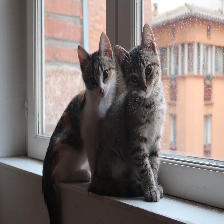

In [55]:
from keras.preprocessing import image

img = image.load_img('noisette-loo.jpg', target_size=(224, 224))
img

In [59]:
type(img)

PIL.Image.Image

In [62]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array.shape

(1, 224, 224, 3)

In [66]:
from keras.applications.imagenet_utils import decode_predictions

y_pred = mob_net.predict(mobilenet.preprocess_input(img_array.copy()))
decode_predictions(y_pred)

[[('n02124075', 'Egyptian_cat', 0.89376384),
  ('n02123045', 'tabby', 0.0657631),
  ('n02123159', 'tiger_cat', 0.025099067),
  ('n04589890', 'window_screen', 0.0085720755),
  ('n02127052', 'lynx', 0.0020095739)]]

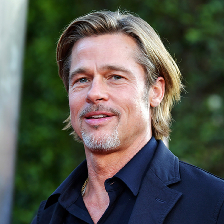

In [68]:
img = image.load_img('brad-pitt.jpg', target_size=(224, 224))
img

In [71]:
def classify(img):
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    y_pred = mob_net.predict(mobilenet.preprocess_input(img_array.copy()))
    return decode_predictions(y_pred)

classify(img)

[[('n03763968', 'military_uniform', 0.9130218),
  ('n04350905', 'suit', 0.007598667),
  ('n03970156', 'plunger', 0.006251033),
  ('n03481172', 'hammer', 0.0051692715),
  ('n03372029', 'flute', 0.004259264)]]

By the way, [orientation matters](https://www.reddit.com/r/dataisbeautiful/comments/aydqig/is_it_a_duck_or_a_rabbit_for_google_cloud_vision/).

We won't take the time to explain an image classifier prediction, but check out [this](https://distill.pub/2018/building-blocks/) and [this](https://github.com/slundberg/shap#deep-learning-example-with-gradientexplainer-tensorflowkeraspytorch-models) if you're interested.

## Fine-tuning

In [ ]:
https://github.com/sakares/keras-fine-tune-cat-dog-vgg16/blob/master/inception-v3-fine-tune.py